 In histopathology and biomedical image analysis, morphometric metrics provide valuable insights into the geometry and complexity of nuclei which can be used to evaluate nuclei pleomorphism. The `histolytics` library offers a comprehensive suite of tools to compute a wide range of shape metrics for nuclei and other segmented objects.

In [16]:
# Install seaborn for visualizing the results.
# !pip install seaborn

,geometry,class_name
uid,,
1,"POLYGON ((29 485.005, 29 492.996, 31.998 497.9...",inflammatory
2,"POLYGON ((19 516.996, 19.998 518.993, 25.651 5...",connective
3,"POLYGON ((25 806.995, 27.995 809.99, 30.995 81...",inflammatory
4,"POLYGON ((36 1576.995, 36.993 1577.988, 45.985...",connective
5,"POLYGON ((32 1601.995, 33.993 1603.988, 37.574...",connective
...,...,...
13368,"POLYGON ((10101 3552.005, 10101.162 3554.174, ...",neoplastic
13369,"POLYGON ((10066 3584.005, 10066 3589.995, 1006...",neoplastic
13370,"POLYGON ((11026 3052.004, 11026 3060.997, 1102...",neoplastic


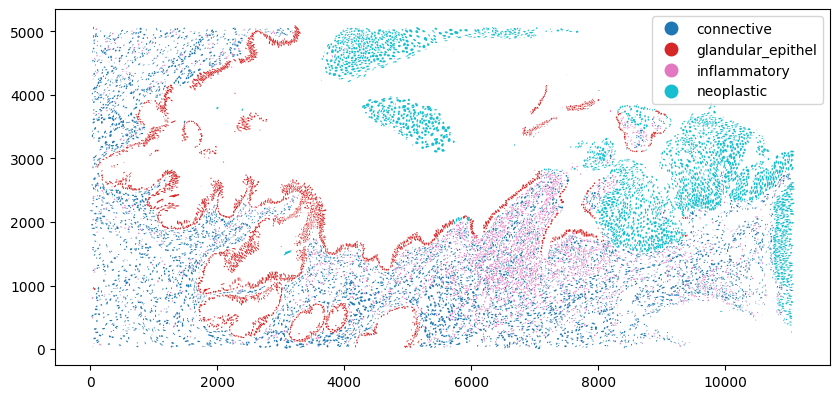

In [2]:
from histolytics.data import cervix_nuclei_crop

nuc = cervix_nuclei_crop()
nuc.plot(figsize=(10, 10), column="class_name", legend=True)
nuc

## Computing Morphological Metrics

We will compute all of the different shape morphological metrics that are available in `histolytics` and then visualize them. The morphological metrics can be computed with the `shape_metric`-function. The available metrics are:

- Area
- Perimeter
- Solidity
- Major Axis Length
- Minor Axis Length
- Major Axis Angle
- Minor Axis Angle
- Convexity
- Compactness
- Circularity
- Eccentricity
- Elongation
- Equivalent Recatangular Index
- Rectangularity
- Squareness
- Sphericity
- Shape Index
- Fractal Dimension


In [3]:
from histolytics.spatial_geom.shape_metrics import shape_metric

metrics = [
    "area",
    "solidity",
    "major_axis_len",
    "major_axis_angle",
    "minor_axis_len",
    "minor_axis_angle",
    "convexity",
    "compactness",
    "circularity",
    "eccentricity",
    "elongation",
    "equivalent_rectangular_index",
    "rectangularity",
    "squareness",
    "shape_index",
    "fractal_dimension",
]

nuc = shape_metric(nuc, metrics=metrics, parallel=True, num_processes=4)

# compute perimeter
metrics.append("perimeter")
nuc["perimeter"] = nuc.length
nuc

,geometry,class_name,area,solidity,major_axis_len,major_axis_angle,minor_axis_len,minor_axis_angle,convexity,compactness,circularity,eccentricity,elongation,equivalent_rectangular_index,rectangularity,squareness,shape_index,fractal_dimension,perimeter
uid,,,,,,,,,,,,,,,,,,,
1,"POLYGON ((29 485.005, 29 492.996, 31.998 497.9...",inflammatory,294.472159,0.992279,21.976612,89.999545,16.976212,0.000455,0.999082,0.909061,0.910733,0.635055,0.772472,0.727584,0.789301,1.157453,0.815479,0.974280,63.801444
2,"POLYGON ((19 516.996, 19.998 518.993, 25.651 5...",connective,704.808300,0.986220,40.988412,45.000643,21.908378,44.999357,0.997811,0.818837,0.822434,0.845167,0.885641,0.732458,0.784874,1.042576,0.720237,0.993642,104.001974
3,"POLYGON ((25 806.995, 27.995 809.99, 30.995 81...",inflammatory,552.898221,0.950128,31.801183,47.276957,23.203572,42.723043,0.986643,0.837890,0.860730,0.683826,0.965478,0.716518,0.749285,1.066834,0.821957,0.989756,91.061351
4,"POLYGON ((36 1576.995, 36.993 1577.988, 45.985...",connective,393.676413,0.984017,24.976512,89.999545,20.976179,0.000455,0.997444,0.828655,0.832907,0.542840,0.839849,0.728765,0.751417,1.055076,0.713557,0.991028,77.265890
5,"POLYGON ((32 1601.995, 33.993 1603.988, 37.574...",connective,401.297157,0.984667,30.976312,0.000119,16.976206,89.999881,0.997073,0.821024,0.825851,0.836453,0.548040,0.713866,0.763125,1.045360,0.711818,0.992600,78.371836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13368,"POLYGON ((10101 3552.005, 10101.162 3554.174, ...",neoplastic,502.084214,0.866430,43.310253,57.804266,17.411344,32.195734,0.983972,0.587113,0.606396,0.915633,0.941137,0.696524,0.665815,0.747536,0.575882,1.046790,103.665042
13369,"POLYGON ((10066 3584.005, 10066 3589.995, 1006...",neoplastic,643.473940,0.985765,41.742560,11.888947,20.885481,78.111053,0.998321,0.773000,0.775602,0.865829,0.536340,0.701513,0.738087,0.984214,0.685636,1.002461,102.277653
13370,"POLYGON ((11026 3052.004, 11026 3060.997, 1102...",neoplastic,1361.789550,0.995665,44.976705,0.000297,34.988345,89.999703,0.999011,0.897157,0.898934,0.628361,0.777926,0.803332,0.865364,1.142296,0.823241,0.981565,138.110197


## Visualizing the Metrics

### Spatial Plots

We will visualize some of the shape metrics of the neoplastic cells. First: **Area** (in pixels)

<Axes: >

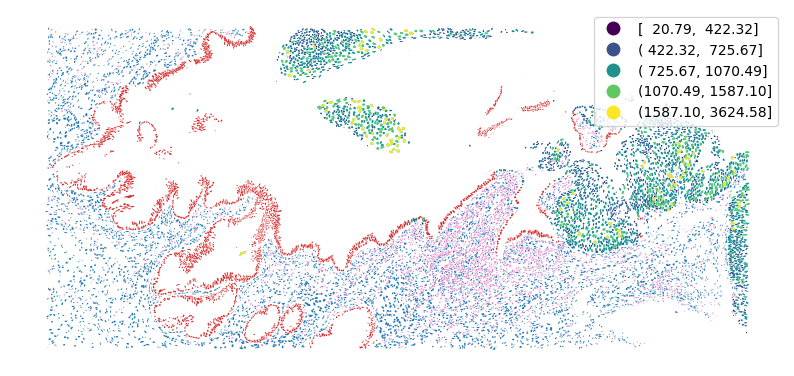

In [ ]:
import mapclassify
import matplotlib.pyplot as plt


# helper function to replace legend items
def replace_legend_items(legend, mapping):
    for txt in legend.texts:
        for k, v in mapping.items():
            if txt.get_text() == str(k):
                txt.set_text(v)


def plot_neoplastic(neoplastic_nuc, col: str = "area", k: int = 5):
    bins = mapclassify.FisherJenks(neoplastic_nuc[col], k=k)
    neoplastic_nuc = neoplastic_nuc.assign(bin_vals=bins.yb)

    fig, ax = plt.subplots(figsize=(10, 10))
    ax = nuc.plot(ax=ax, column="class_name", legend=False)
    ax = neoplastic_nuc.plot(
        ax=ax, column="bin_vals", legend=True, cmap="viridis", categorical=True
    )

    bin_legends = bins.get_legend_classes()
    mapping = dict([(i, s) for i, s in enumerate(bin_legends)])
    replace_legend_items(ax.get_legend(), mapping)
    ax.set_axis_off()

    return ax


neo = nuc[nuc["class_name"] == "neoplastic"]
plot_neoplastic(neo, col="area", k=5)

**Eccentricity**

<Axes: >

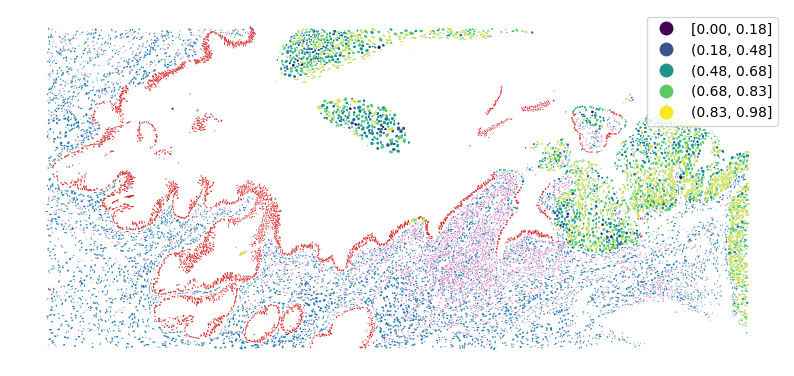

In [14]:
plot_neoplastic(neo, col="eccentricity", k=5)

**Fractal Dimension**

<Axes: >

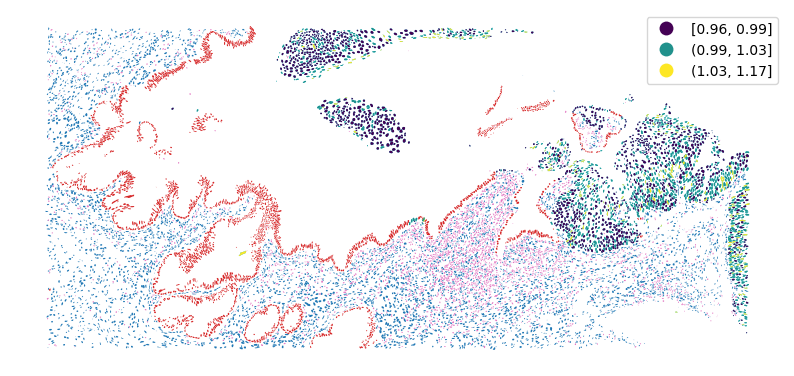

In [15]:
plot_neoplastic(neo, col="fractal_dimension", k=3)

### Kernel Density Estimation (KDE) Plots

Let's plot all the metrics with KDE with cell type grouping.

In [ ]:
import seaborn


# Let's first define a quick function to plot the data distributions with seaborn
def plot_kde(tidy_data):
    seaborn.set_style("whitegrid")
    seaborn.set_theme(font_scale=1.5)

    # Setup the facets
    facets = seaborn.FacetGrid(
        data=tidy_data,
        col="Attribute",
        hue="Cell Type",
        sharey=False,
        sharex=False,
        aspect=2,
        col_wrap=2,
    )

    # Build the plot from `sns.kdeplot`
    kde_ax = facets.map(seaborn.kdeplot, "Values", fill=True).add_legend()
    return kde_ax

Let's tidy up the data first

In [ ]:
m = list(metrics)
tidy = nuc.reset_index().set_index("class_name")
tidy = tidy[m]
tidy = tidy.stack()
tidy = tidy.reset_index()
tidy = tidy.rename(
    columns={"class_name": "Cell Type", "level_1": "Attribute", 0: "Values"}
)
tidy

,Cell Type,Attribute,Values
0,inflammatory,area,294.472159
1,inflammatory,solidity,0.992279
2,inflammatory,major_axis_len,21.976612
3,inflammatory,major_axis_angle,89.999545
4,inflammatory,minor_axis_len,16.976212
...,...,...,...
227183,neoplastic,rectangularity,0.891786
227184,neoplastic,squareness,1.118194
227185,neoplastic,shape_index,0.800407
227186,neoplastic,fractal_dimension,0.984168


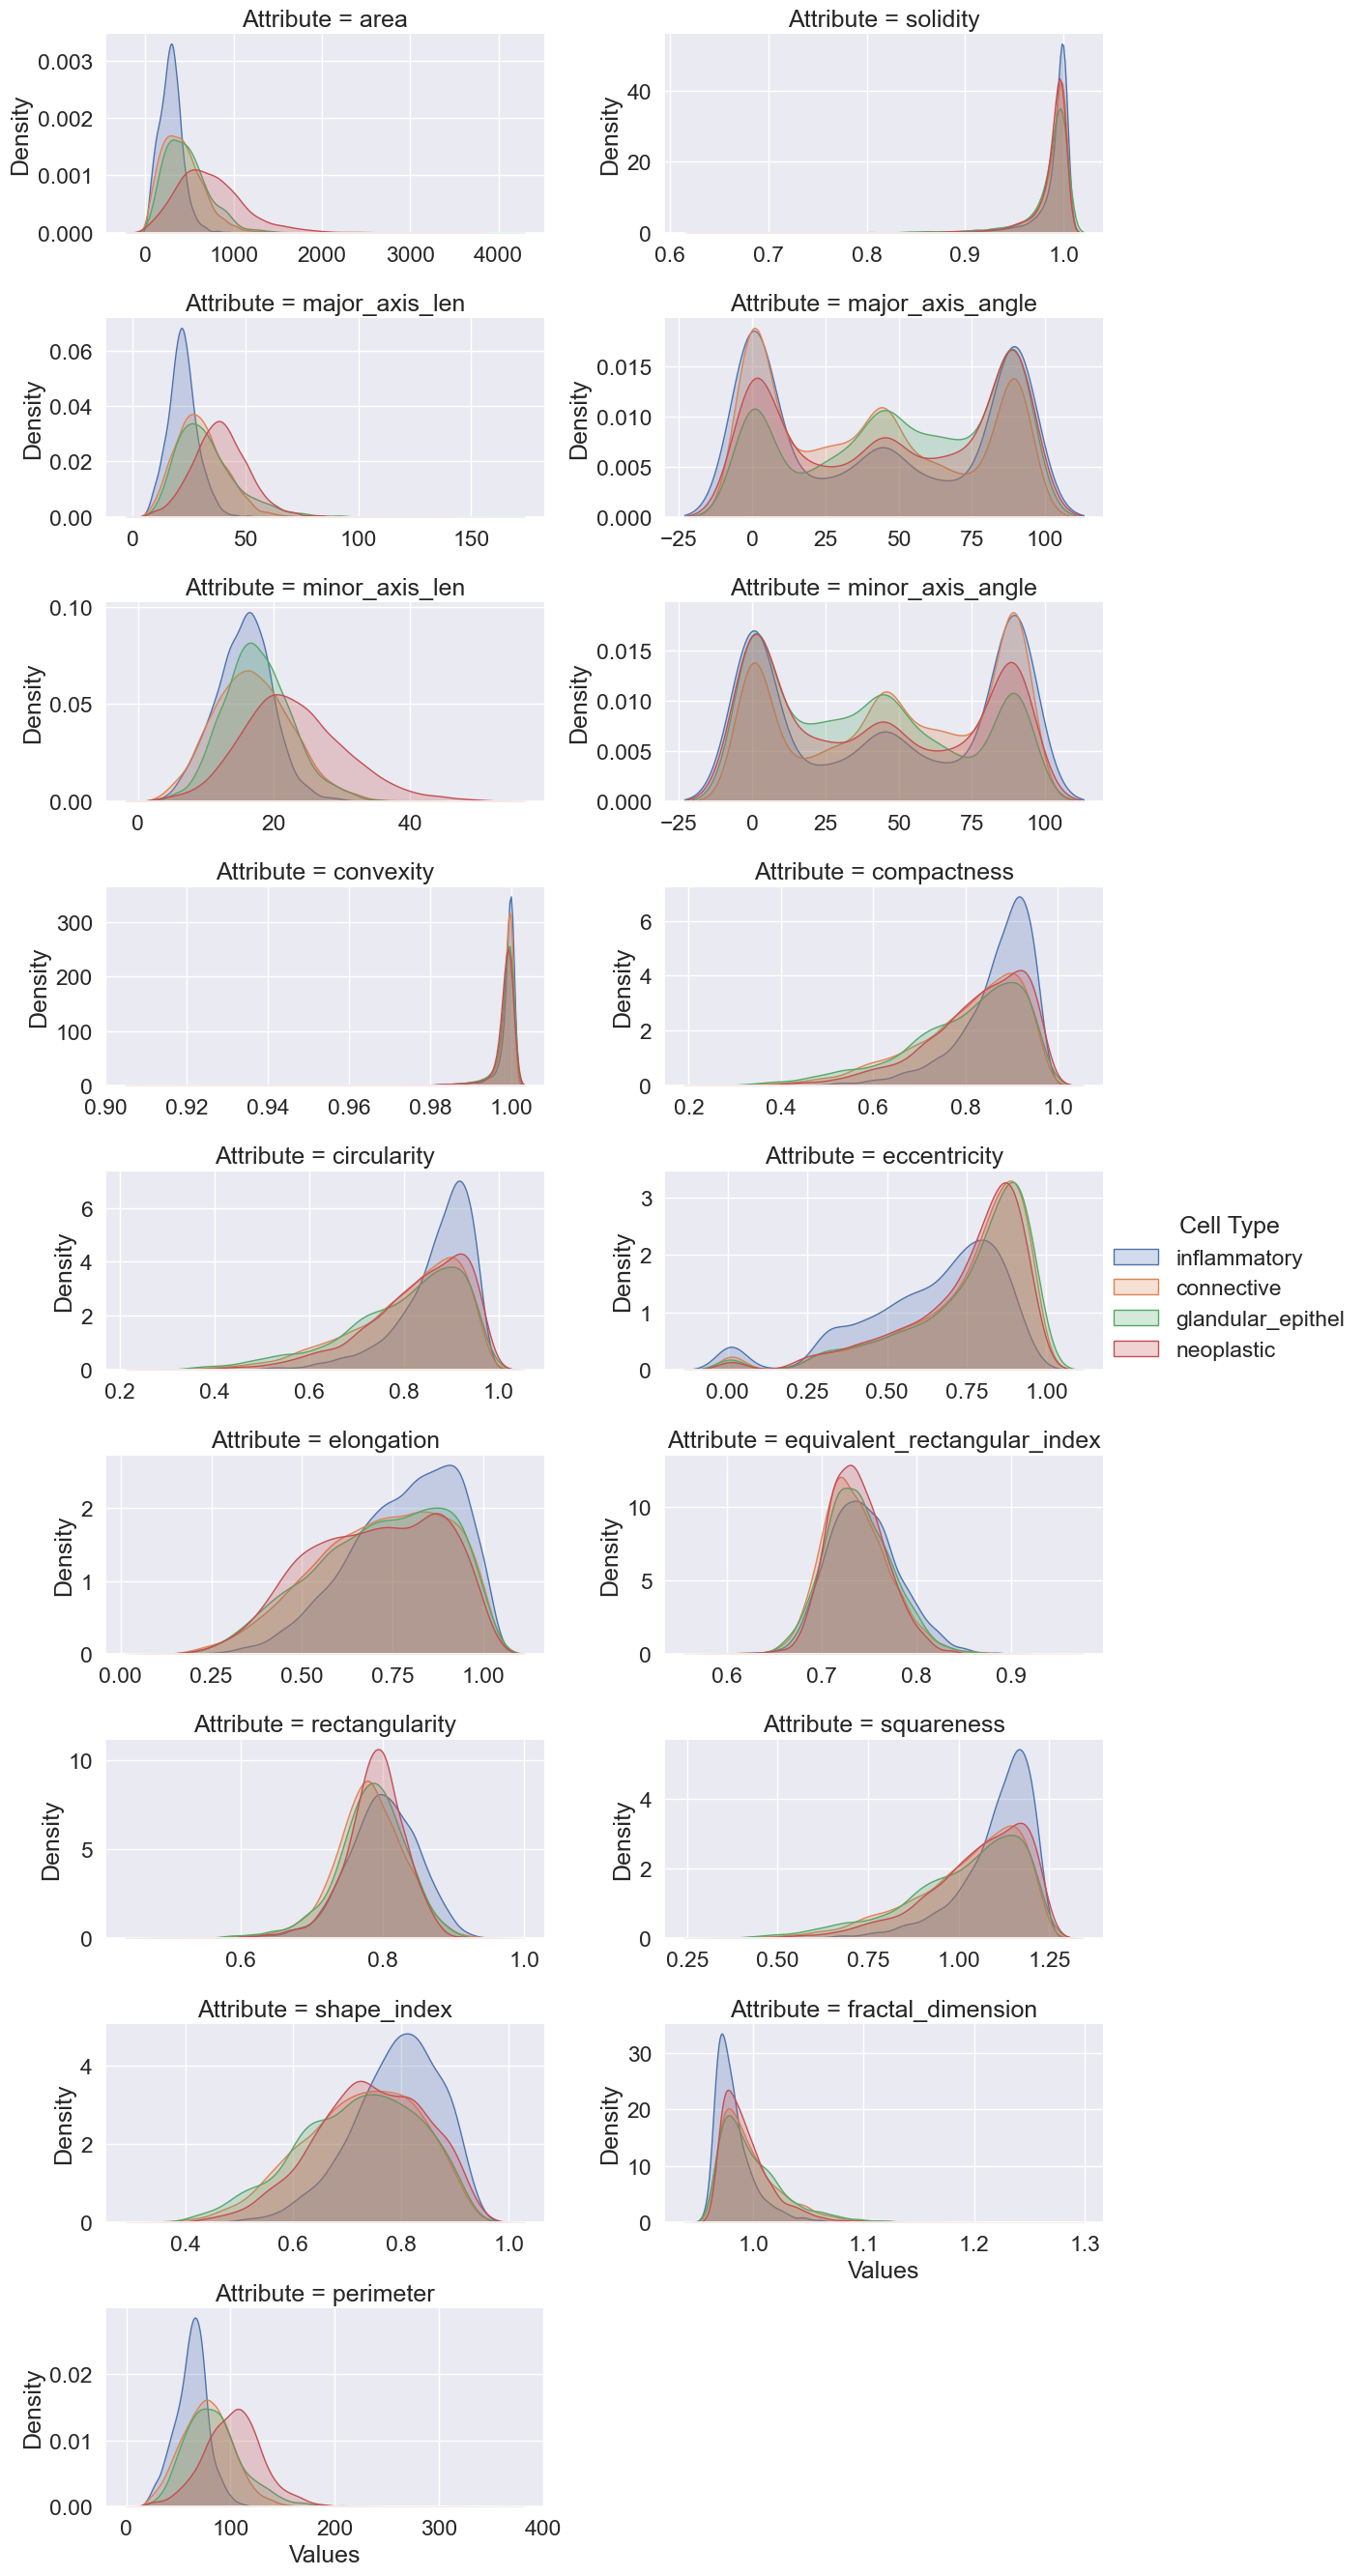

In [ ]:
plot_kde(tidy)

Here. it is clear that the inflammatory and neoplastic nuclei differ from the the rest based on the distributions. Inflammatory nuclei tend to be smaller, more circular, compact, spherical and have a lower major axis length, eccentricity and fractal dimension (fractal dimension measures the complexity of the boundary). In contrast, the neoplastic tend to be larger in size than the rest of the nuclei. This is in line with what we would expect.